In [ ]:
import pandas as pd
import statistics as est
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

Saving campeonatos_futebol_atualizacao.csv to campeonatos_futebol_atualizacao.csv


In [ ]:
dados = pd.read_csv("campeonatos_futebol_atualizacao.csv")
pd.set_option('display.max_columns', None)
dados.head()
#dados[["Posse 1(%)", "Posse 2(%)"]]
dados.loc[dados['Tiros-livres 1'] > dados['Impedimentos 2'] + dados['Faltas 2']]#.shape
#com o '.shape', percebe-se que são 31 linhas com dados suspeitos de serem incoerentes (já que recuo para o goleiro é improvável)

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
5669,5.0,6.0,0.0,1.0,2.0,4.0,1.0,3.0,11.0,7.0,1.0,2.0,0.0,0.0,NaN,NaN,6.0,19.0,NaN,NaN,NaN,NaN,3.0,4.0,9.0,2.0,NaN,NaN,NaN,NaN,9.0,11.0,2.0,2.0,40.0,60.0,Genoa,Atalanta,3-5-2,3-4-2-1
5880,6.0,2.0,0.0,0.0,13.0,6.0,2.0,6.0,13.0,15.0,2.0,4.0,0.0,0.0,NaN,NaN,32.0,28.0,NaN,NaN,NaN,NaN,2.0,1.0,8.0,8.0,NaN,NaN,NaN,NaN,16.0,13.0,2.0,4.0,56.0,44.0,Sassuolo,Torino,4-2-3-1,3-4-3
5989,4.0,9.0,0.0,3.0,3.0,14.0,5.0,4.0,8.0,11.0,3.0,3.0,0.0,1.0,NaN,NaN,7.0,21.0,NaN,NaN,NaN,NaN,2.0,1.0,8.0,7.0,NaN,NaN,NaN,NaN,15.0,9.0,8.0,2.0,30.0,70.0,Lecce,Lazio,4-3-1-2,3-5-2
13915,4.0,6.0,1.0,1.0,5.0,7.0,2.0,0.0,12.0,19.0,1.0,3.0,0.0,0.0,NaN,NaN,12.0,16.0,NaN,NaN,NaN,NaN,0.0,2.0,2.0,7.0,NaN,NaN,NaN,NaN,21.0,13.0,4.0,4.0,53.0,47.0,Angers,Bordeaux,4-1-4-1,4-3-3
14041,10.0,3.0,1.0,2.0,12.0,3.0,5.0,2.0,12.0,6.0,3.0,0.0,0.0,1.0,NaN,NaN,19.0,12.0,NaN,NaN,NaN,NaN,2.0,2.0,3.0,9.0,NaN,NaN,NaN,NaN,9.0,13.0,2.0,7.0,63.0,37.0,Lyon,Brest,4-3-3,4-4-2
14137,3.0,2.0,1.0,1.0,7.0,7.0,4.0,5.0,13.0,12.0,2.0,1.0,0.0,0.0,NaN,NaN,17.0,21.0,NaN,NaN,NaN,NaN,1.0,2.0,8.0,7.0,NaN,NaN,NaN,NaN,14.0,14.0,0.0,2.0,45.0,55.0,Metz,Strasbourg,3-4-3,4-2-3-1
14332,5.0,2.0,0.0,2.0,4.0,8.0,6.0,3.0,14.0,19.0,3.0,4.0,0.0,0.0,NaN,NaN,29.0,26.0,NaN,NaN,NaN,NaN,1.0,0.0,8.0,8.0,NaN,NaN,NaN,NaN,22.0,14.0,2.0,4.0,63.0,37.0,Montpellier,Nimes,3-4-3,5-3-2
14368,6.0,2.0,1.0,4.0,5.0,7.0,6.0,1.0,13.0,11.0,3.0,2.0,0.0,0.0,NaN,NaN,17.0,20.0,NaN,NaN,NaN,NaN,2.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN,16.0,14.0,2.0,3.0,50.0,50.0,Olympique,Strasbourg,4-3-3,3-5-2
14383,5.0,2.0,1.0,1.0,4.0,8.0,3.0,2.0,12.0,20.0,1.0,1.0,0.0,0.0,NaN,NaN,22.0,19.0,NaN,NaN,NaN,NaN,1.0,0.0,8.0,5.0,NaN,NaN,NaN,NaN,22.0,13.0,2.0,4.0,37.0,63.0,Angers,Strasbourg,4-1-4-1,4-3-3
14401,0.0,8.0,2.0,1.0,3.0,7.0,3.0,6.0,7.0,8.0,1.0,1.0,0.0,0.0,NaN,NaN,21.0,16.0,NaN,NaN,NaN,NaN,0.0,4.0,10.0,7.0,NaN,NaN,NaN,NaN,10.0,9.0,4.0,0.0,45.0,55.0,Amiens,Strasbourg,4-2-3-1,4-3-1-2


In [ ]:
#O número de tiros livres não pode ser maior que o número de faltas mais o número de impedimentos, a priori
#Nem toda falta é um tiro-livre, pode ter vantagem (dependendo do site é ou não considerado como falta nos dados) ou ser pênalti
#O outro caso é um recuo para o goleiro, que não é uma falta, mas é muito improvável que aconteça
dados.loc[dados['Tiros-livres 2'] > dados['Impedimentos 1'] + dados['Faltas 1'],['Tiros-livres 2', 'Impedimentos 1', 'Faltas 1']]#.shape
#com o '.shape', percebe-se que são 28 linhas com dados incoerentes, apesar que os valores são próximos

,Tiros-livres 2,Impedimentos 1,Faltas 1
5480,17.0,1.0,15.0
5801,19.0,3.0,14.0
5866,13.0,3.0,9.0
5919,24.0,2.0,21.0
5948,19.0,4.0,14.0
5953,19.0,2.0,16.0
5989,9.0,0.0,8.0
13946,14.0,2.0,11.0
14028,12.0,0.0,11.0
14084,16.0,1.0,13.0


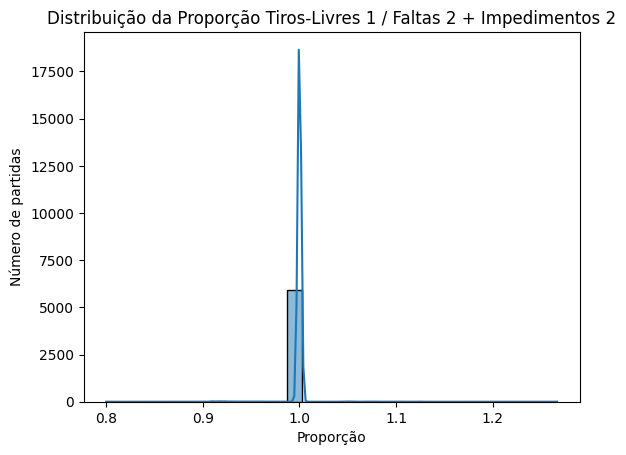

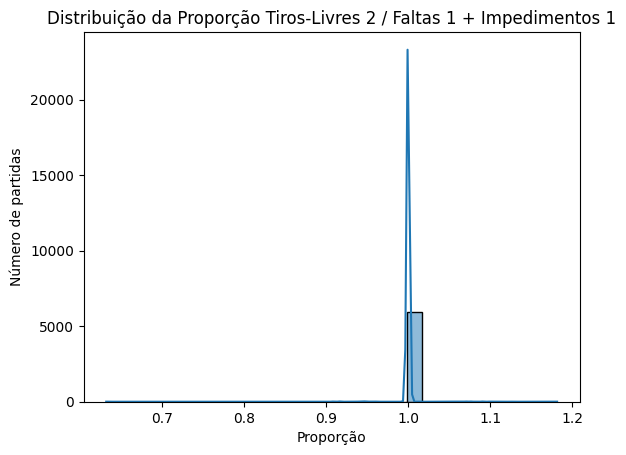

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dados['proporcao_tiro_falta'] = dados['Tiros-livres 1'] / (dados['Faltas 2'] + dados['Impedimentos 2'])
sns.histplot(dados['proporcao_tiro_falta'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 1 / Faltas 2 + Impedimentos 2')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
dados['proporcao'] = dados['Tiros-livres 2'] / (dados['Faltas 1'] + dados['Impedimentos 1'])
sns.histplot(dados['proporcao'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 2 / Faltas 1 + Impedimentos 1')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
#analisando o gráfico, percebe-se que a relação entre Tiros Livre e (Faltas + Impedimento) é quase 1 para 1 como o esperado
#Note que quando o time 2 comete falta ou impedimento, o time 1 é quem cobra

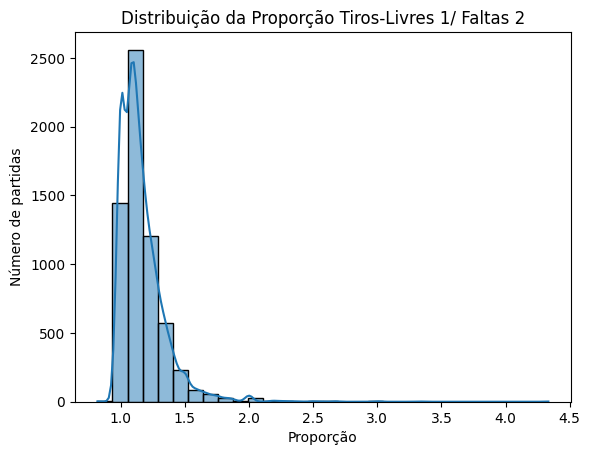

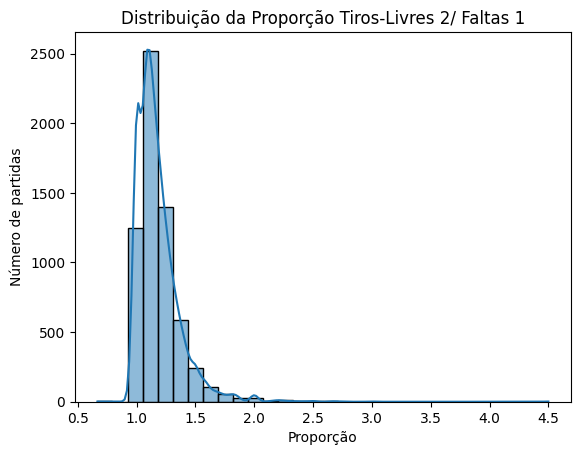

In [ ]:
dados['proporcao_tiro_falta'] = dados['Tiros-livres 1'] / (dados['Faltas 2'])
sns.histplot(dados['proporcao_tiro_falta'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 1/ Faltas 2')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
dados['proporcao_tiro_falta'] = dados['Tiros-livres 2'] / (dados['Faltas 1'])
sns.histplot(dados['proporcao_tiro_falta'], bins=30, kde=True)
plt.title('Distribuição da Proporção Tiros-Livres 2/ Faltas 1')
plt.xlabel('Proporção')
plt.ylabel('Número de partidas')
plt.show()
#Nesse caso, a estimativa já não é tão boa quanto o outro, o que leva a crer que a substituição dos valores nulos de Tiros Livres seja melhor com (faltas + impedimentos)

In [ ]:
#Fazer a análise se vale a pena com a quantidade de dados faltante de Faltas + Impedimentos, e ver se compensa a pouca quantidade de dados dos Tiros-Livres
dados.loc[dados['Impedimentos 2'].isnull()].shape

(2774, 42)

In [ ]:
dados.loc[dados['Faltas 2'].isnull()].shape

(2322, 42)

In [ ]:
dados.loc[dados['Tiros-livres 1'].isnull()].shape
#percebe-se que a quantidade de valores nulos no Tiros livres é muito superior que Faltas + Impedimentos, mesmo se considerarmos que os conjuntos são disjuntos, ainda é 5 vezes maior aproximadamente

(21470, 42)

<ipython-input-10-20bd7016909b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['Tiros-livres 1']).set_title('Tiros Livres 1')


Text(0.5, 1.0, 'Tiros Livres 1')

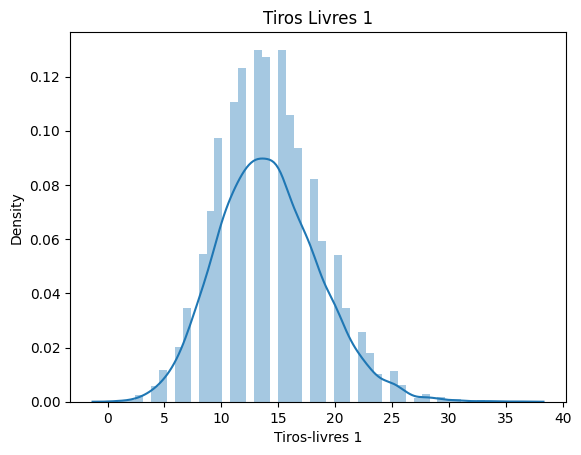

In [ ]:
sns.distplot(dados['Tiros-livres 1']).set_title('Tiros Livres 1')

<ipython-input-11-36a0a28ef5eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['Impedimentos 2']+ dados['Faltas 2']).set_title('F2 + I2')


Text(0.5, 1.0, 'F2 + I2')

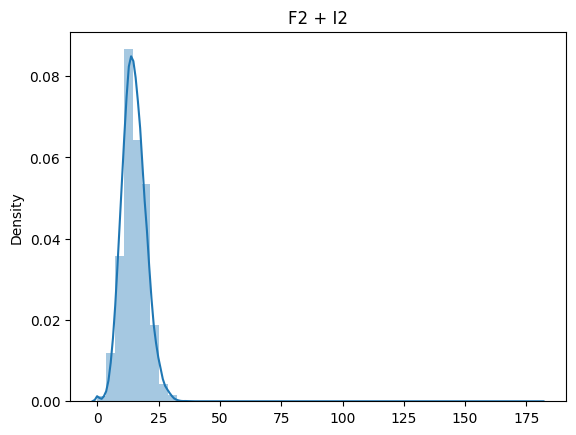

In [ ]:
sns.distplot(dados['Impedimentos 2']+ dados['Faltas 2']).set_title('F2 + I2')
#percebe-se que o gráfico é semelhante, mas alguns pontos no eixo x mostram que há mais outliers que devem ser tratados. Como Tiros livres não passa de 40, 40 então se torna um valor razoável de limite superior
#para Impedimentos + Faltas

In [ ]:
dados['Faltas 1'].describe() #chega a 46
dados['Faltas 2'].describe() #chega a 180, claro outlier

,Faltas 2
count,25394.000000
mean,12.946444
std,4.608542
min,0.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,180.000000


In [ ]:
dados['Impedimentos 1'].describe() #max 23
dados['Impedimentos 2'].describe() #max 15

,Impedimentos 2
count,24942.000000
mean,1.968527
std,1.681298
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


In [ ]:
#após tratamento de dados de Impedimentos e Faltas, podemos substituir os valores nulos de Tiros livres, pela soma dos dois, pelos argumentos mostrados acima
# Cria a soma das colunas auxiliares
substituto = dados['Faltas 2'] + dados['Impedimentos 2']

# Substitui apenas onde Tiros-livres 1 é nulo
dados['Tiros-livres 1'] = dados['Tiros-livres 1'].fillna(substituto) #colocar (inplace = True) para substituir nos dados
dados['Tiros-livres 1'].describe()
#dados.['Tiros-livres 1'].isnull().sum() #apenas 2541 dados nulos

substituto1 = dados['Faltas 1'] + dados['Impedimentos 1']

# Substitui apenas onde Tiros-livres 2 é nulo
dados['Tiros-livres 2'] = dados['Tiros-livres 2'].fillna(substituto) #colocar (inplace = True) para substituir nos dados
dados['Tiros-livres 2'].describe()
dados['Tiros-livres 2'].isnull().sum() #apenas 2541 dados nulos

np.int64(2541)

In [ ]:
#Análise de possíveis erros em dados categóricos
agrupado = dados.groupby(['Position 1']).size()
agrupado
#todos somam 10, então não dá para excluir

,0
Position 1,
3-1-3-1-2,2
3-1-4-2,71
3-2-3-2,13
3-2-4-1,2
3-3-2-2,5
3-3-3-1,5
3-4-1-2,387
3-4-2-1,556
3-4-3,852


In [ ]:
#Análise de possíveis erros em dados categóricos
agrupado1 = dados.groupby(['Position 2']).size()
agrupado1
#todos somam 10, então não dá para excluir

,0
Position 2,
3-1-3-1-2,1
3-1-4-2,68
3-2-3-2,10
3-2-4-1,1
3-3-1-3,1
3-3-2-2,4
3-3-3-1,12
3-4-1-2,386
3-4-2-1,545


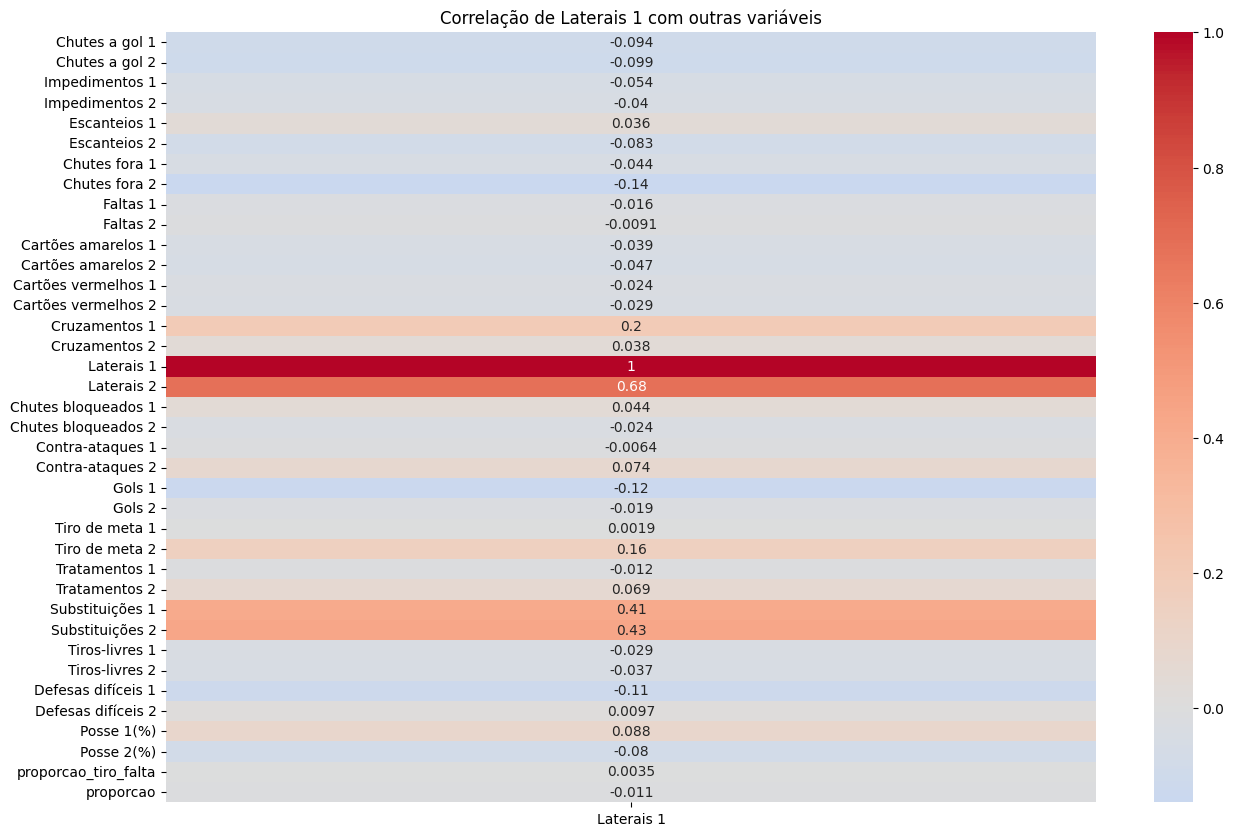

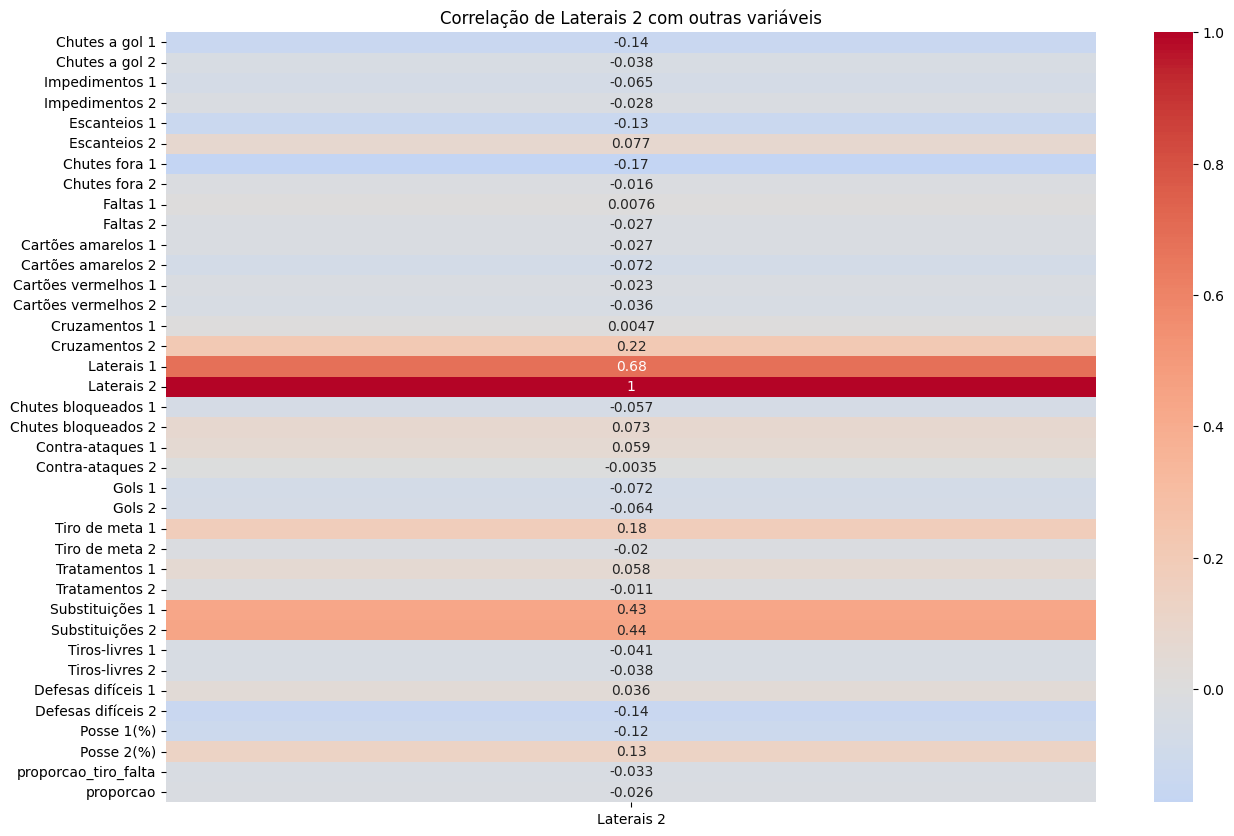

In [ ]:

# Seleciona apenas colunas numéricas
dados_numericos = dados.select_dtypes(include='number')

# Cria a matriz de correlação
correlacao = dados_numericos.corr()

# Visualiza a correlação com heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao[['Laterais 1']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlação de Laterais 1 com outras variáveis')
plt.show()

# Repete para o time 2 se quiser
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao[['Laterais 2']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlação de Laterais 2 com outras variáveis')
plt.show()
#heatmap para saber a relação de laterais com outras variáveis
#diferentemente dos tiros livres, não há uma correlação direta de lateral com outras variáveis. A substituição normalmente ocorre depois de lateral, mas há muito mais lateral que substituições

In [ ]:
laterais_1 = dados[['Time 1', 'Laterais 1']].rename(columns={'Time 1': 'Time', 'Laterais 1': 'Laterais'})
laterais_2 = dados[['Time 2', 'Laterais 2']].rename(columns={'Time 2': 'Time', 'Laterais 2': 'Laterais'})
laterais_total = pd.concat([laterais_1, laterais_2])


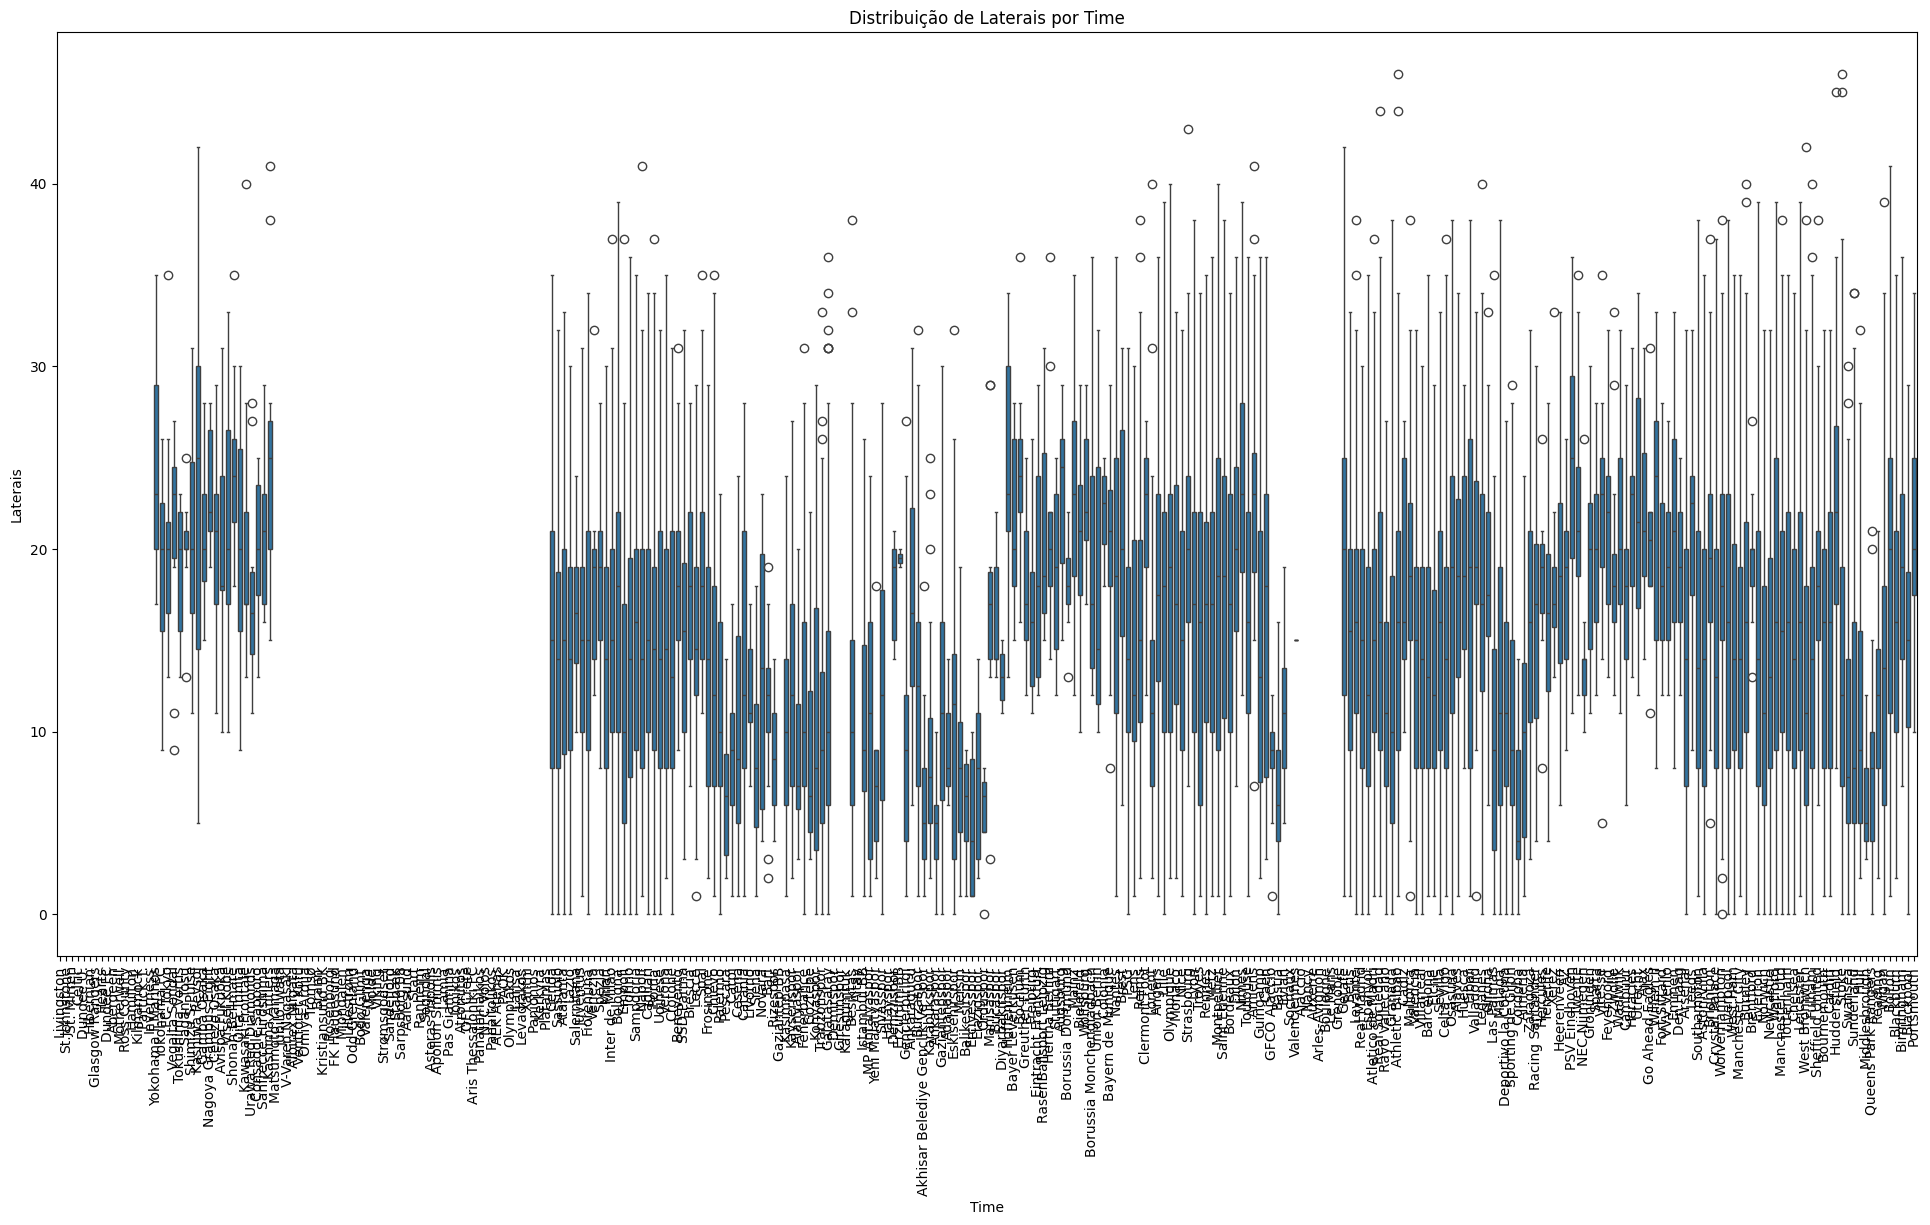

In [ ]:
laterais_total = laterais_total.reset_index(drop=True)
plt.figure(figsize=(24,12))
sns.boxplot(x='Time', y='Laterais', data=laterais_2)
plt.xticks(rotation=90)
plt.title('Distribuição de Laterais por Time')
plt.show()
#tentativa de analisar se os laterais dependem do time ou não

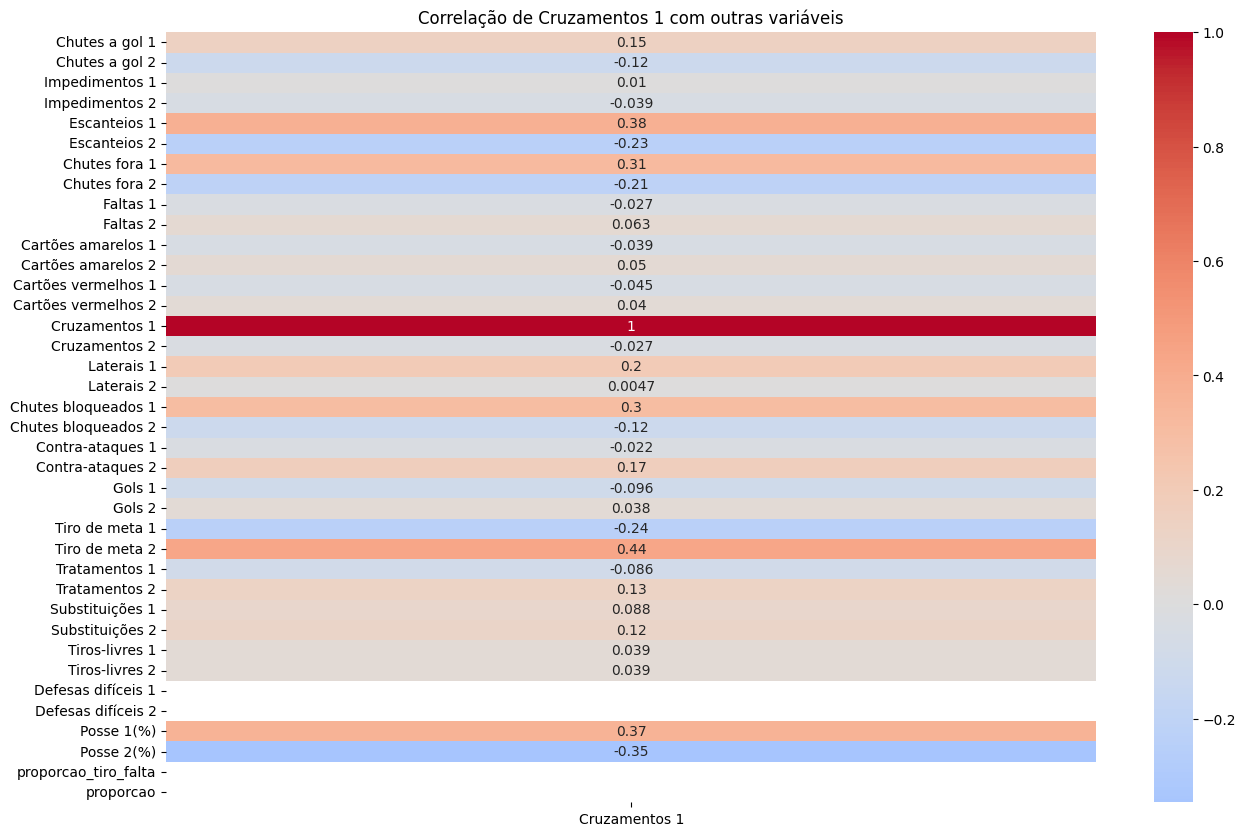

In [ ]:
# Seleciona apenas colunas numéricas
dados_numericos = dados.select_dtypes(include='number')

# Cria a matriz de correlação
correlacao = dados_numericos.corr()

# Visualiza a correlação com heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao[['Cruzamentos 1']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlação de Cruzamentos 1 com outras variáveis')
plt.show()
#possíveis derivadas de cruzamentos certos: chute a gol, chutes fora, chutes bloqueados e gols
#possíveis derivadas de cruzamentos errados: laterais, escanteio e tiro de meta 2

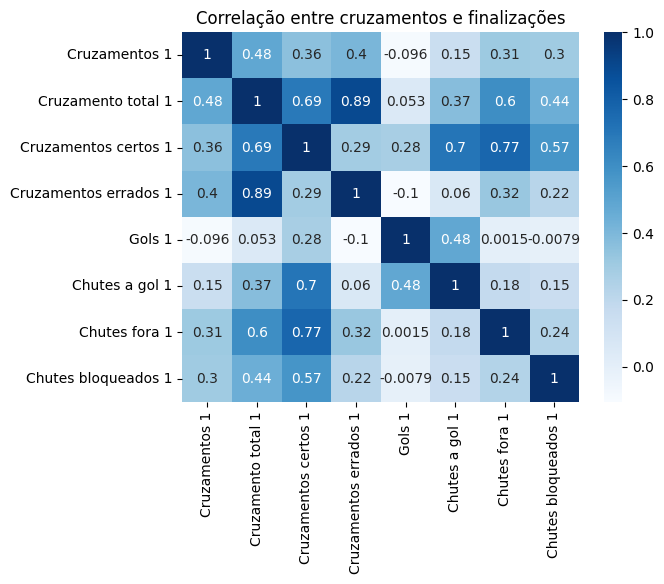

In [ ]:
dados['Cruzamentos certos 1'] = dados['Chutes a gol 1'] + dados['Chutes fora 1'] + dados['Chutes bloqueados 1'] #+ dados['Gols 1']
dados['Cruzamentos errados 1'] = dados['Contra-ataques 2'] + dados['Escanteios 1'] + dados['Laterais 2'] + dados['Tiro de meta 2']
dados['Cruzamento total 1'] = dados['Cruzamentos certos 1']  + dados['Cruzamentos errados 1']
colunas_interesse = ['Cruzamentos 1','Cruzamento total 1','Cruzamentos certos 1', 'Cruzamentos errados 1', 'Gols 1', 'Chutes a gol 1', 'Chutes fora 1', 'Chutes bloqueados 1']
sns.heatmap(dados[colunas_interesse].corr(), annot=True, cmap='Blues')
plt.title("Correlação entre cruzamentos e finalizações")
plt.show()



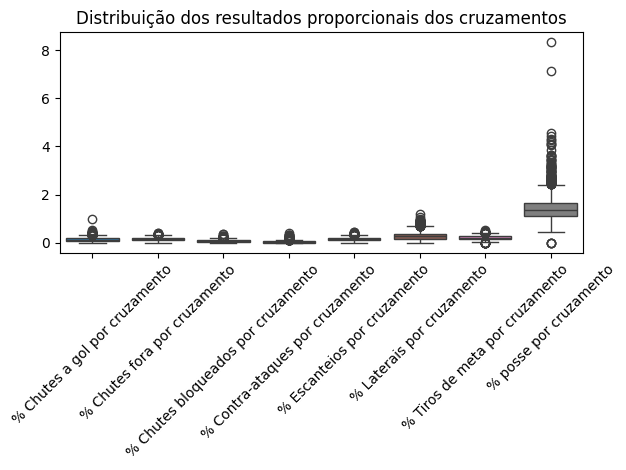

In [ ]:
dados['% Chutes a gol por cruzamento'] = dados['Chutes a gol 1'] / dados['Cruzamento total 1']
dados['% Chutes fora por cruzamento'] = dados['Chutes fora 1'] / dados['Cruzamento total 1']
dados['% Chutes bloqueados por cruzamento'] = dados['Chutes bloqueados 1'] / dados['Cruzamento total 1']
dados['% Contra-ataques por cruzamento'] = dados['Contra-ataques 2'] / dados['Cruzamento total 1']
dados['% Escanteios por cruzamento'] = dados['Escanteios 1'] / dados['Cruzamento total 1']
dados['% Laterais por cruzamento'] = dados['Laterais 1'] / dados['Cruzamento total 1']
dados['% Tiros de meta por cruzamento'] = dados['Tiro de meta 2'] / dados['Cruzamento total 1']
dados['% posse por cruzamento'] = dados['Posse 1(%)'] / dados['Cruzamento total 1']
colunas_proporcionais = [
    '% Chutes a gol por cruzamento',
    '% Chutes fora por cruzamento',
    '% Chutes bloqueados por cruzamento',
    '% Contra-ataques por cruzamento',
    '% Escanteios por cruzamento',
    '% Laterais por cruzamento',
    '% Tiros de meta por cruzamento',
    '% posse por cruzamento'
]

sns.boxplot(data=dados[colunas_proporcionais])
plt.xticks(rotation=45)
plt.title("Distribuição dos resultados proporcionais dos cruzamentos")
plt.tight_layout()
plt.show()


In [ ]:
dados[colunas_proporcionais].mean().sort_values(ascending=False)


,0
% posse por cruzamento,1.417473
% Laterais por cruzamento,0.282896
% Tiros de meta por cruzamento,0.208859
% Chutes fora por cruzamento,0.148216
% Escanteios por cruzamento,0.145332
% Chutes a gol por cruzamento,0.136725
% Chutes bloqueados por cruzamento,0.065806
% Contra-ataques por cruzamento,0.032513


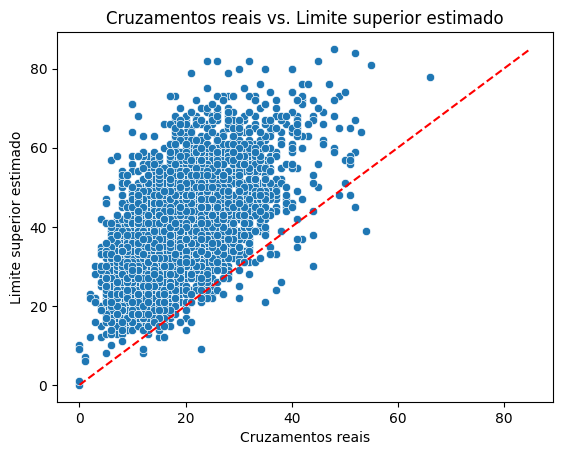

,limite_superior,Cruzamentos 1
limite_superior,1.000000,0.572892
Cruzamentos 1,0.572892,1.000000


In [ ]:
dados['limite_superior'] = (dados['Chutes a gol 1'] + dados['Escanteios 1'] + dados['Chutes fora 1']+ dados['Chutes bloqueados 1'] + dados['Laterais 1'] + dados['Contra-ataques 2'] + dados['Tiro de meta 2'])
sns.scatterplot(x='Cruzamentos 1', y='limite_superior', data=dados)
plt.title("Cruzamentos reais vs. Limite superior estimado")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Limite superior estimado")
plt.plot([0, dados[['Cruzamentos 1', 'limite_superior']].max().max()],
         [0, dados[['Cruzamentos 1', 'limite_superior']].max().max()],
         'r--')  # linha de referência
plt.show()


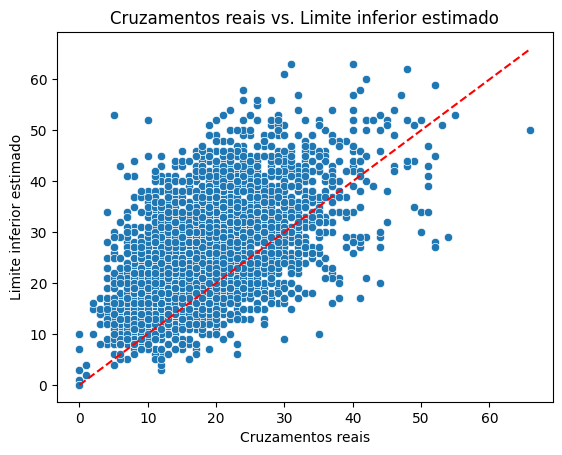

,Cruzamentos 1,limite_inferior
Cruzamentos 1,1.000000,0.538528
limite_inferior,0.538528,1.000000


In [ ]:
dados['limite_inferior'] = dados['Gol 1'] +  dados['Tiro de meta 2']+ dados['Escanteios 1'] + dados['Laterais 1'] + dados['Contra-ataques 2']
#maioria dos tiros de meta 2 seriam derivados dos chutes fora, chutes bloqueados gerariam escanteios e contra ataques
sns.scatterplot(x='Cruzamentos 1', y='limite_inferior', data=dados)
plt.title("Cruzamentos reais vs. Limite inferior estimado")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Limite inferior estimado")
plt.plot([0, dados[['Cruzamentos 1', 'limite_inferior']].max().max()],
         [0, dados[['Cruzamentos 1', 'limite_inferior']].max().max()],
         'r--')  # linha de referência
plt.show()
dados[['Cruzamentos 1', 'limite_inferior']].corr()

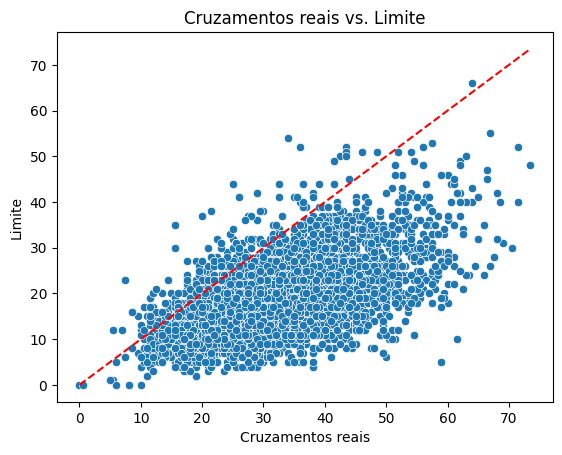

,limite,Cruzamentos 1
limite,1.000000,0.568135
Cruzamentos 1,0.568135,1.000000


In [ ]:
dados['limite'] = (dados['limite_superior'] + dados['limite_inferior'])/2
sns.scatterplot(x='limite', y='Cruzamentos 1', data=dados)
plt.title("Cruzamentos reais vs. Limite")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Limite")
plt.plot([0, dados[['limite', 'Cruzamentos 1']].max().max()],
         [0, dados[['limite', 'Cruzamentos 1']].max().max()],
         'r--')  # linha de referência
plt.show()
dados[['limite', 'Cruzamentos 1']].corr()

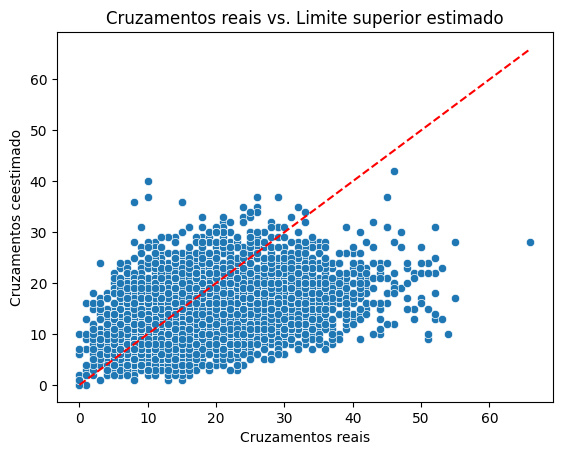

,cruzamento_c,Cruzamentos 1
cruzamento_c,1.000000,0.357831
Cruzamentos 1,0.357831,1.000000


In [ ]:
#possíveis derivadas de cruzamentos certos: chute a gol, chutes fora, chutes bloqueados
#possíveis derivadas de cruzamentos errados: laterais, escanteio e tiro de meta 2
#voltando a essa hipótese, vamos ver como se comportam os dois tipos de cruzamentos
#Primeiro analisando a distribuição dos cruzamentos certos com os cruzamentos totais
dados['cruzamento_c'] = dados['Chutes a gol 1'] + dados['Chutes fora 1'] + dados['Chutes bloqueados 1']
sns.scatterplot(x='Cruzamentos 1', y='cruzamento_c', data=dados)
plt.title("Cruzamentos reais vs. Cruzamentos certos")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Cruzamentos certos")
plt.plot([0, dados[['Cruzamentos 1', 'cruzamento_c']].max().max()],
         [0, dados[['Cruzamentos 1', 'cruzamento_c']].max().max()],
         'r--')  # linha de referência
plt.show()
dados[['cruzamento_c', 'Cruzamentos 1']].corr()

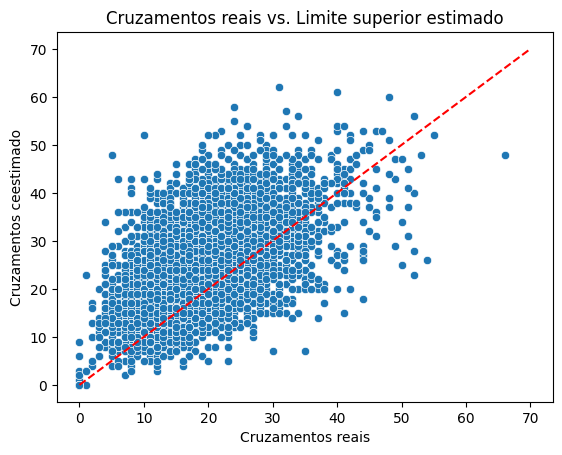

,cruzamento_e,Cruzamentos 1
cruzamento_e,1.000000,0.526406
Cruzamentos 1,0.526406,1.000000


In [ ]:
#possíveis derivadas de cruzamentos certos: chute a gol, chutes fora, chutes bloqueados
#possíveis derivadas de cruzamentos errados: laterais, escanteio e tiro de meta 2
#voltando a essa hipótese, vamos ver como se comportam os dois tipos de cruzamentos
#analisando a distribuição dos cruzamentos errados com os cruzamentos totais
dados['cruzamento_e'] = dados['Laterais 1'] + dados['Escanteios 1'] + dados['Tiro de meta 2']
sns.scatterplot(x='Cruzamentos 1', y='cruzamento_e', data=dados)
plt.title("Cruzamentos reais vs. Cruzamentos errados")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Cruzamentos errados")
plt.plot([0, dados[['Cruzamentos 1', 'cruzamento_e']].max().max()],
         [0, dados[['Cruzamentos 1', 'cruzamento_e']].max().max()],
         'r--')  # linha de referência
plt.show()
dados[['cruzamento_e', 'Cruzamentos 1']].corr()

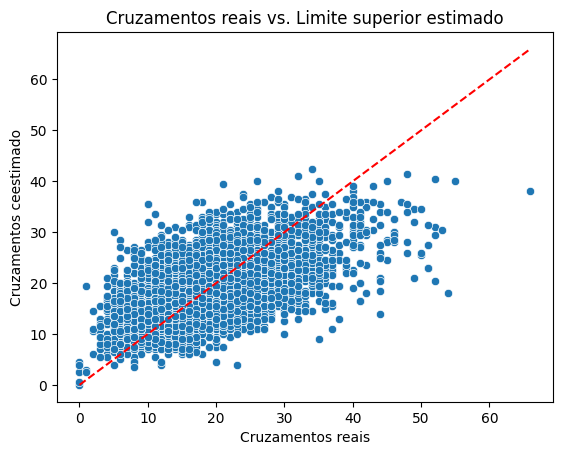

,c,Cruzamentos 1
c,1.000000,0.555809
Cruzamentos 1,0.555809,1.000000


In [ ]:
dados['c'] = (dados['cruzamento_e'] + dados['cruzamento_c'])/2
sns.scatterplot(x='Cruzamentos 1', y='c', data=dados)
plt.title("Cruzamentos reais vs. Limite superior estimado")
plt.xlabel("Cruzamentos reais")
plt.ylabel("Cruzamentos média")
plt.plot([0, dados[['Cruzamentos 1', 'c']].max().max()],
         [0, dados[['Cruzamentos 1', 'c']].max().max()],
         'r--')  # linha de referência
plt.show()
dados[['c', 'Cruzamentos 1']].corr()